# Import libraries

In [27]:
%%capture libraries   

import sys
import os
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install mne
!{sys.executable} -m pip install mne-features
import numpy as np
import matplotlib 
import pathlib
import mne
import seaborn as sns
import pandas as pd
from mne.io import concatenate_raws, read_raw_edf
from mne import Epochs, create_info, events_from_annotations
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs,corrmap
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch, tfr_stockwell,tfr_multitaper,tfr_array_morlet,AverageTFR
from scipy import signal
from scipy.integrate import simps
from scipy.signal import welch
from scipy.stats import ttest_ind
matplotlib.use('Qt5Agg') #allow interactive plots
import matplotlib.pyplot as plt
from mne.decoding import GeneralizingEstimator, Scaler,cross_val_multiscore, LinearModel, get_coef, Vectorizer, CSP, SlidingEstimator
from mne.viz import centers_to_edges
from mne.baseline import rescale
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, precision_recall_curve, average_precision_score, plot_precision_recall_curve, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
import pywt

 
# Models
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

%run EEG_Preprocessing.ipynb import load_data, excl_chan, filter_data, make_epochs, plot_data, epochs_power
 

## Load Datasets (30 sessions)

In [2]:
%%capture libraries   

raw_datasets = load_data(os.getcwd());

## Exclude unwanted channels

In [3]:
include_channels = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']; #reference_channels = ['CQ_CMS', 'CQ_DRL']
excl_chan(raw_datasets);

## Apply Band-Pass Filter between 1-30Hz

In [4]:
filter_data(raw_datasets)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 

- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)



[<RawEDF | Giuseppe03_03.02.21_08.33.04.edf, 14 x 45312 (177.0 s), ~4.9 MB, data loaded>,
 <RawEDF | Giuseppe14_11.02.21_08.36.41.edf, 14 x 45568 (178.0 s), ~4.9 MB, data loaded>,
 <RawEDF | Giuseppe29_19.02.21_08.40.08.edf, 14 x 44544 (174.0 s), ~4.8 MB, data loaded>,
 <RawEDF | Giuseppe17_12.02.21_08.44.40.edf, 14 x 44800 (175.0 s), ~4.8 MB, data loaded>,
 <RawEDF | Giuseppe13_11.02.21_08.28.07.edf, 14 x 44800 (175.0 s), ~4.8 MB, data loaded>,
 <RawEDF | Giuseppe21_16.02.21_08.44.29.edf, 14 x 45056 (176.0 s), ~4.8 MB, data loaded>,
 <RawEDF | Giuseppe27_18.02.21_08.54.59.edf, 14 x 44288 (173.0 s), ~4.7 MB, data loaded>,
 <RawEDF | Giuseppe04_03.02.21_08.43.13.edf, 14 x 47104 (184.0 s), ~5.0 MB, data loaded>,
 <RawEDF | Giuseppe02_02.02.21_08.30.42.edf, 14 x 45824 (179.0 s), ~4.9 MB, data loaded>,
 <RawEDF | Giuseppe15_11.02.21_08.46.24.edf, 14 x 44800 (175.0 s), ~4.8 MB, data loaded>,
 <RawEDF | Giuseppe19_16.02.21_08.24.47.edf, 14 x 44544 (174.0 s), ~4.8 MB, data loaded>,
 <RawEDF |

## Create Epochs

In [5]:
epoched_data=make_epochs(raw_datasets, 10) 
print(epoched_data.get_data().shape) #300,14,2432 ie n_epochs, chans, samples

Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
20 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
30 matching events found
Applying base

Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
250 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
260 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline 

## Apply ICA

In [6]:
#Apply ICA to all epochs

picks = raw_datasets[0].info['ch_names'] #define the eeg channels we want to include in the analysis, in this case all of them
ica=ICA(n_components=14, method='fastica', max_iter=10000, random_state=89) #define the parameters
ica.fit(epoched_data,  picks = picks, reject = dict(eeg = 200e-6)) #apply ICA to epochs


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 3.2s.


<ICA | epochs decomposition, fit (fastica): 729600 samples, 14 components, channels used: "eeg">

Plot ICA components:

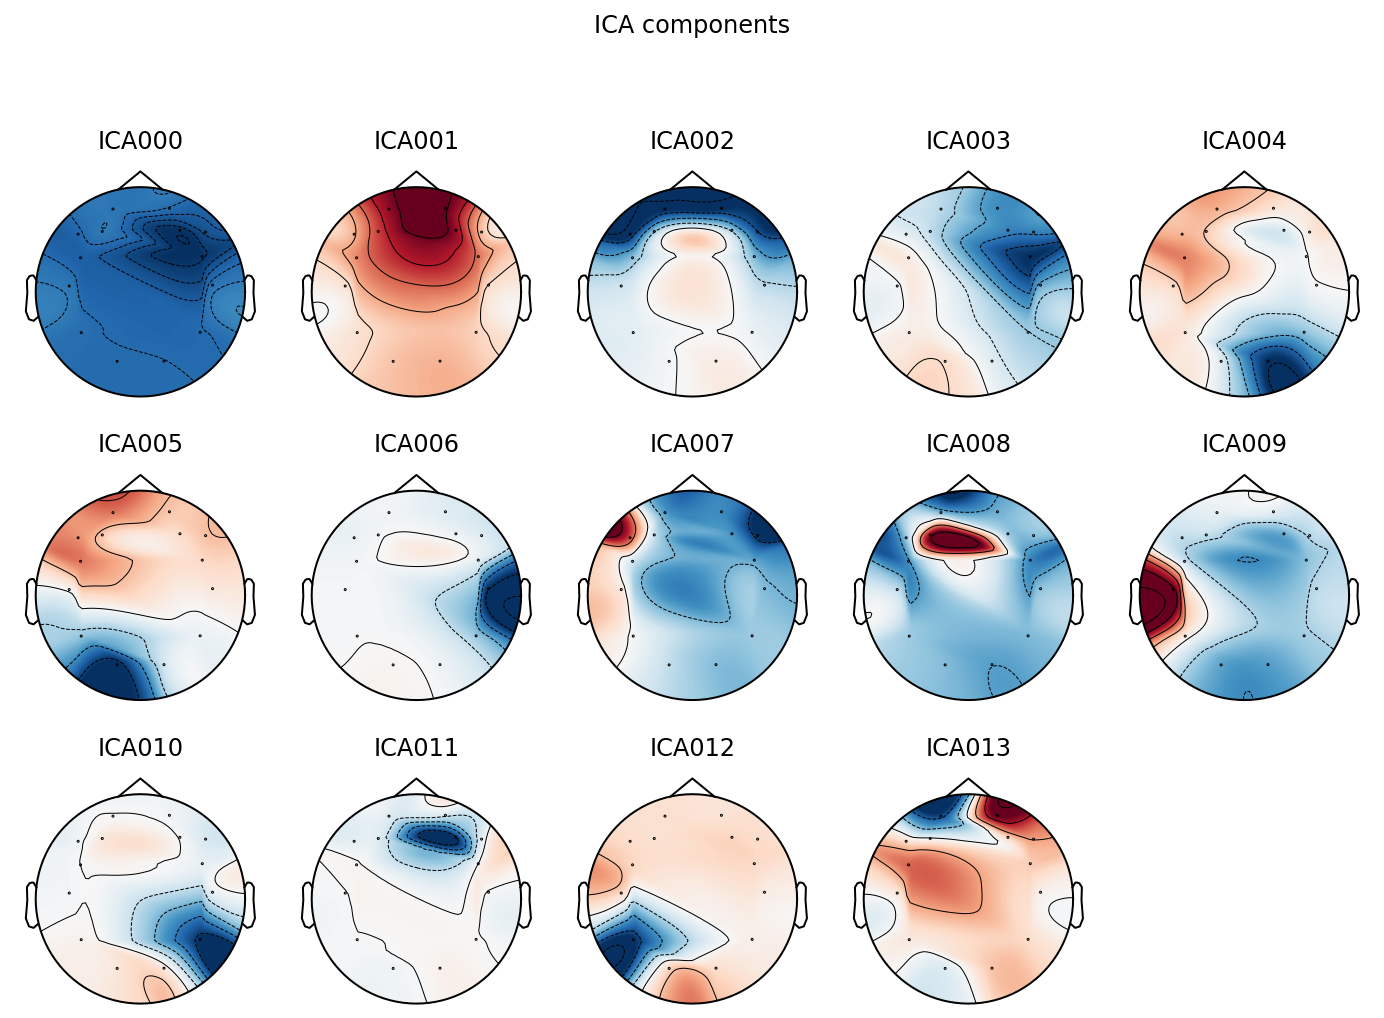

In [16]:
ica.plot_components(picks=range(14), inst=epoched_data)   

In [7]:
ica.exclude=[0,1,13] #exclude eye movements, heartbeat and saccade

Before excluding the above identified ICA components, check also their time course:

Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


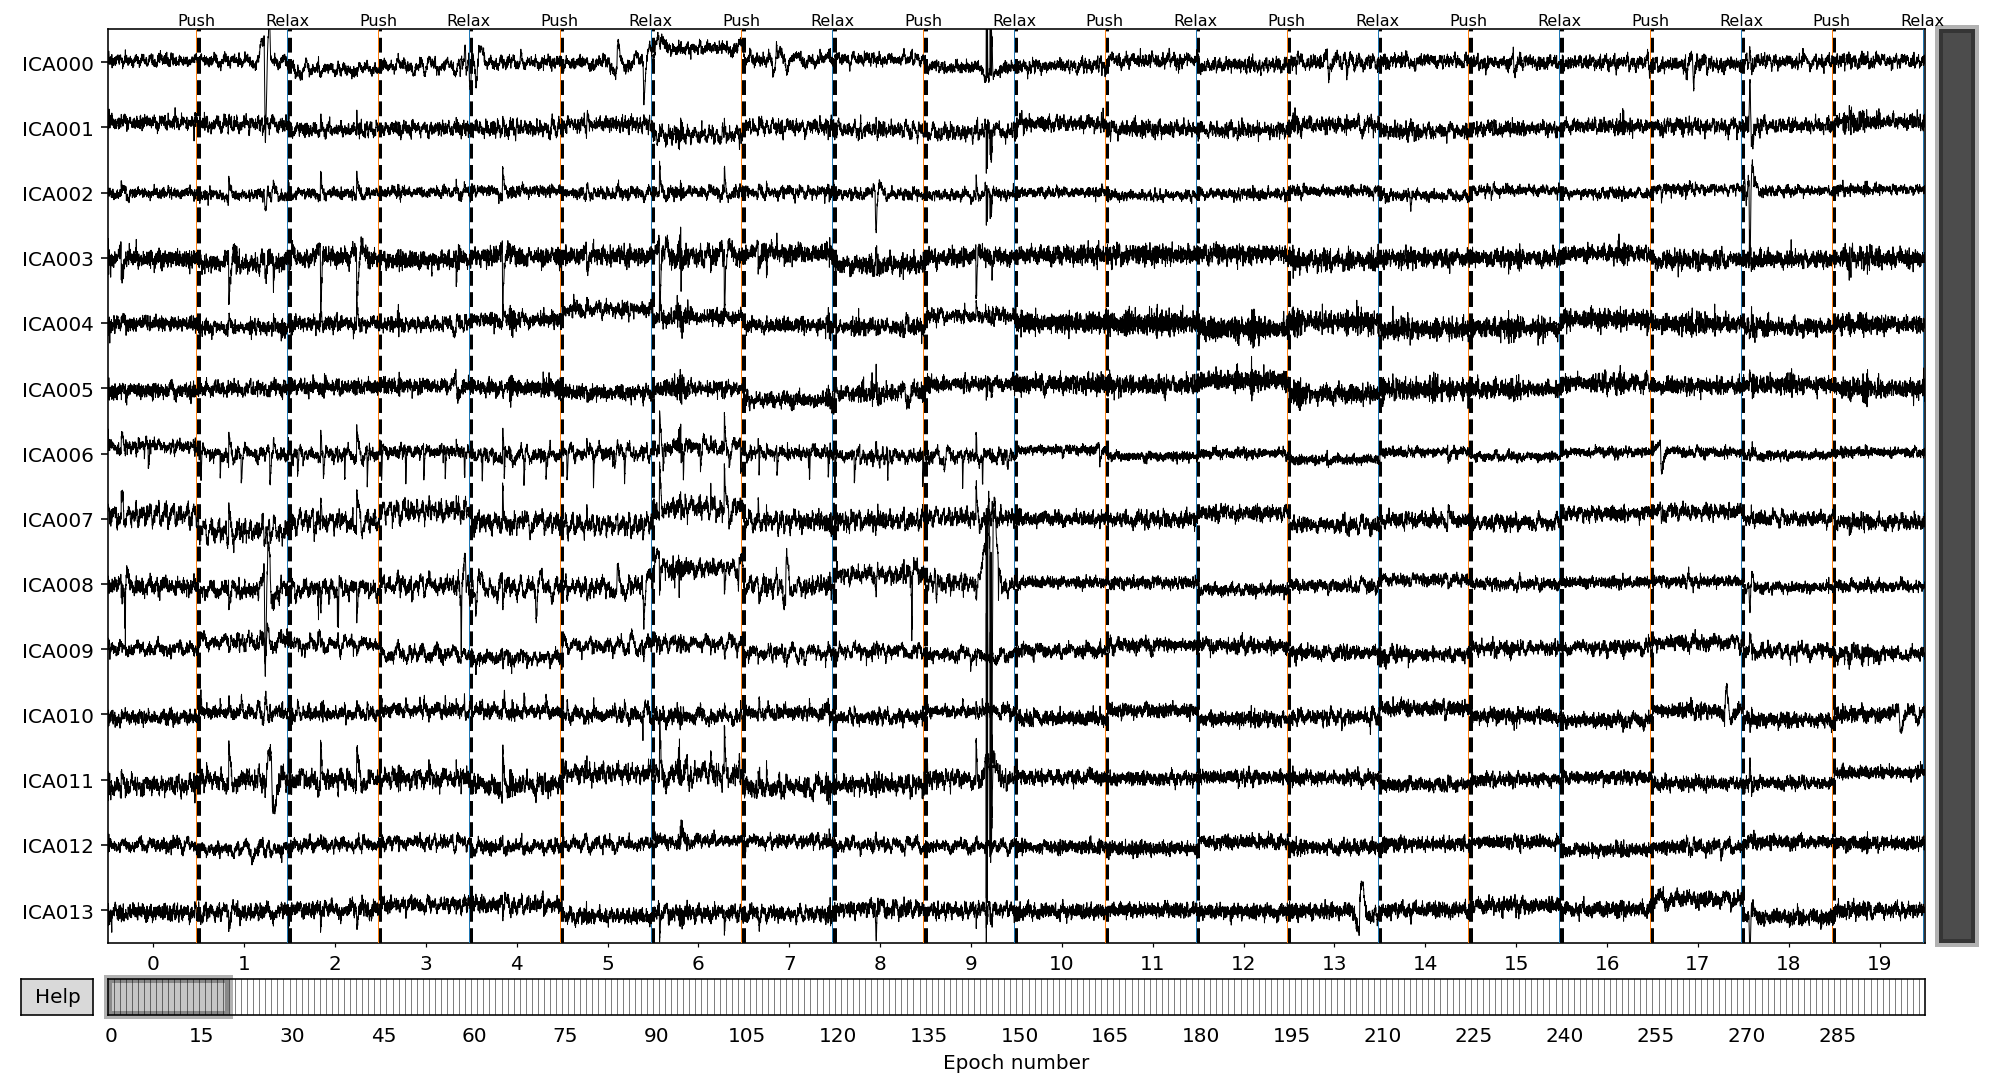

In [17]:
ica.plot_sources(epoched_data)

It seems that also ICA components 7 and 8 might be problematic, use plot_overlay to overlay the raw and cleaned signals and see if by exlcuding these two additional components there is a difference:

Applying ICA to Evoked instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components


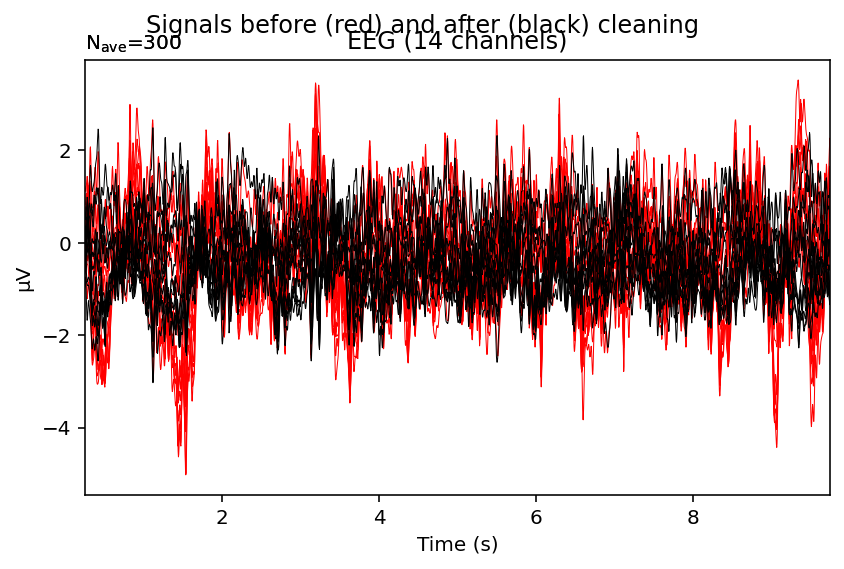

In [7]:
epoevo=epoched_data.average() #create an evoked object

ica.plot_overlay(epoevo, exclude=[0,1,13], picks='eeg')  

Applying ICA to Evoked instance
    Transforming to ICA space (14 components)
    Zeroing out 5 ICA components
    Projecting back using 14 PCA components


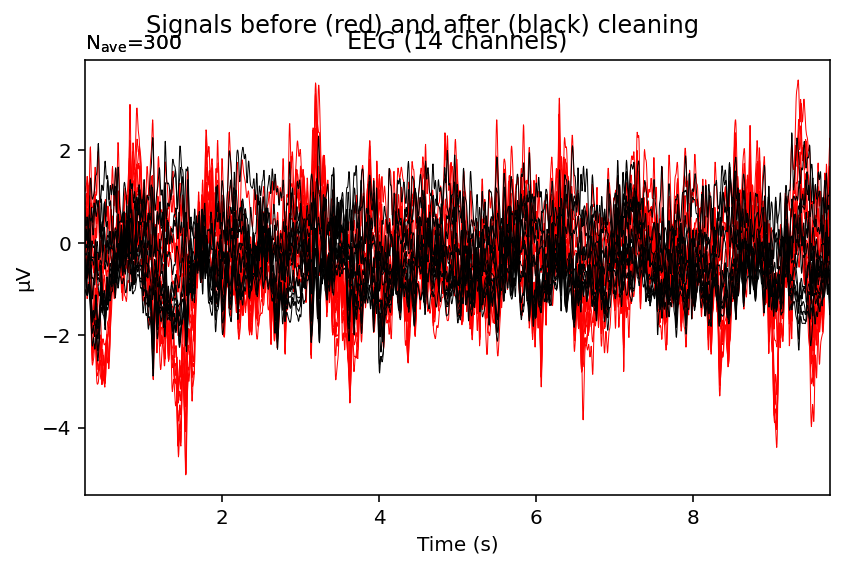

In [8]:
ica.plot_overlay(epoevo, exclude=[0,1,13, 7, 8], picks='eeg')  #no difference

Apply ICA:

In [8]:
ica.apply(epoched_data, exclude=ica.exclude)  

Applying ICA to Epochs instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components


<Epochs |  300 events (all good), 0.25 - 9.74609 sec, baseline [0, 0] sec (baseline period was cropped after baseline correction), ~78.0 MB, data loaded,
 'Push': 150
 'Relax': 150>

## Reject Bad Epochs Manually, after visual inspections

In [ ]:
# Because the cleaned file is too large to be upoaded on github, around 40MB, in order to proceed with the analysis 
# I will use PTP amplitude to remove bad epochs (but I am not using this function in my thesis work):

In [9]:
#Because I have eliminated 20 bad epochs manually, I will choose a PTP amplitude threshold that can replicate this result:

reject_criteria = dict(eeg=300e-6) #PTP threshold
epoched_data.drop_bad(reject=reject_criteria) 

print(epoched_data.get_data().shape) #print the new data shape
print(epoched_data.drop_log) #print the total number of epochs rejected

    Rejecting  epoch based on EEG : ['F3', 'F4']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['FC5', 'AF4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T8', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['AF3', 'F8', 'AF4']
13 bad epochs dropped
(287, 14, 2432)
((), (), (), (), (), (), (), (), (), ('F3', 'F4'), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()

## Plot PSD for each condition

In [ ]:
epoched_data['Relax'].plot_psd(average=True)

In [ ]:
epoched_data['Push'].plot_psd(average=True)

## Compare the previous periodogram with the Welch's method

Here we are computing the PSD for the occipital channel O1:

In [10]:
#concatenate epochs in order to have 1 dimensional array

data_relax=[]
for sample in range (0, len(epoched_data['Relax'])):
    x=list(epoched_data['Relax'].get_data()[sample][6][:]) #O1 chan
    data_relax += x
    
print(len(data_relax)) #the shape is given by n_epochs*n_samples (type: epoched_data['Relax'].get_data().shape[0] * 2432)
 
data_push=[]
for sample in range (0, len(epoched_data['Push'])):
    x=list(epoched_data['Push'].get_data()[sample][6][:]) #O1 chan
    data_push += x

    
print(len(data_push))#the shape is given by n_epochs*n_samples (type: epoched_data['Push'].get_data().shape[0] * 2432)


345344
352640


In [24]:
#Compute Welch's using scipy
%matplotlib inline

sfreq=epoched_data.info['sfreq']
win = 4 * sfreq # Define window length (4 seconds)
Fxx, Pxx = welch(data_relax, sfreq, nperseg=win, window='hanning',  detrend="linear") 


Text(0.5, 1.0, 'PSD')

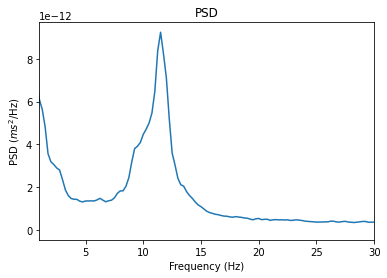

In [25]:
plt.plot(Fxx, Pxx)
plt.xlim([1, 30])
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"PSD $(ms^ 2$/Hz)")
plt.title("PSD")


(4.0, 18.0)

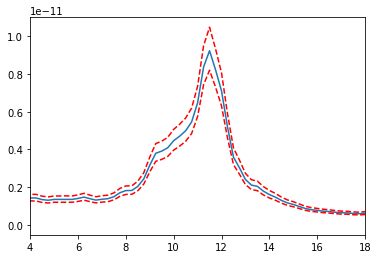

In [26]:
#Plot with confidence interval (from scipy):

from scipy.stats import chi2

#95% probability
probability = 0.95
P=256
alfa = 1 - probability
v = 2 * P
c = chi2.ppf([1 - alfa / 2, alfa / 2], v)
c = v / c

Pxx_lower = Pxx * c[0]
Pxx_upper = Pxx * c[1]

plt.plot(Fxx, Pxx)
plt.plot(Fxx, Pxx_lower, 'r--')
plt.plot(Fxx, Pxx_upper, 'r--')
plt.xlim([4,18])

Run a simple t-test to see if the two conditions are significantly different: 

In [29]:
#from scipy

t,p=ttest_ind(data_relax, data_push) #channel O1

print('p: ' + str(p.round(4)))
print('t: ' + str(t.round(4)))

p: 0.0
t: -51.2836


In [35]:
#Compute absolute and relative power in O1

low, high=8,12 # limit alpha band
idx_alpha=np.logical_and(Fxx>=low, Fxx<=high)

#absolute power
freq_res=Fxx[1]-Fxx[0]
#absolute power by approximateing the area under the curve
alpha_power=simps(Pxx[idx_alpha], dx=freq_res)
print('Absolute alpha power: %.15f uV^2' %alpha_power)

#relative power
total_power=simps(Pxx, dx=freq_res)
alpha_rel_power=np.round(np.divide(alpha_power,total_power),3)
print('Relative alpha power: %.15f uV^2' %alpha_rel_power)
print('Thus, ', alpha_rel_power*100, '% of the total power of the signal is contained in alpha frequency band' )

Absolute alpha power: 0.000000000019436 uV^2
Relative alpha power: 0.346000000000000 uV^2
Thus,  34.599999999999994 % of the total power of the signal is contained in alpha frequency band


## Compute Time-Frequency Representation using Morlet Wavelet Analysis

MNE function:
https://mne.tools/stable/generated/mne.time_frequency.tfr_morlet.html

In [36]:
freqs = np.logspace(*np.log10([2, 30]), num=40) # define frequencies of interest (log-spaced) 
n_cycles = freqs / 2.  # different number of cycle per frequency


#Compute power for RELAX condition
power_r = mne.time_frequency.tfr_morlet(epoched_data['Relax'], freqs=freqs, n_cycles=n_cycles, 
                                           use_fft=True, average=True,
                                           return_itc=False, decim=3, n_jobs=1)

#Compute power for PUSH condition
power_p= mne.time_frequency.tfr_morlet(epoched_data['Push'], freqs=freqs, n_cycles=n_cycles, 
                                           use_fft=True, average=True,
                                           return_itc=False, decim=3, n_jobs=1)

Average the power for each frequency band of interest: 


In [37]:

#Alpha band Relax 

relax_pow_a = [] #store the power average for each channel  

for a_file in range(0, len(raw_datasets[0].ch_names)): #for each file in the range 0-14
    pow_ar = power_r.data[a_file][(power_r.freqs>=8) & (power_r.freqs<=12)] #select the alpha band freqs range
    pow_avg_ar = np.mean(pow_ar, axis=0) #compute the average
    relax_pow_a.append(pow_avg_ar)  
    

#Alpha band Push

push_pow_a = []

for d_file in range(0, len(raw_datasets[0].ch_names)):
    pow_ap = power_p.data[d_file][(power_p.freqs>=8) & (power_p.freqs<=12)] 
    pow_avg_ap = np.mean(pow_ap, axis=0)
    push_pow_a.append(pow_avg_ap)
    

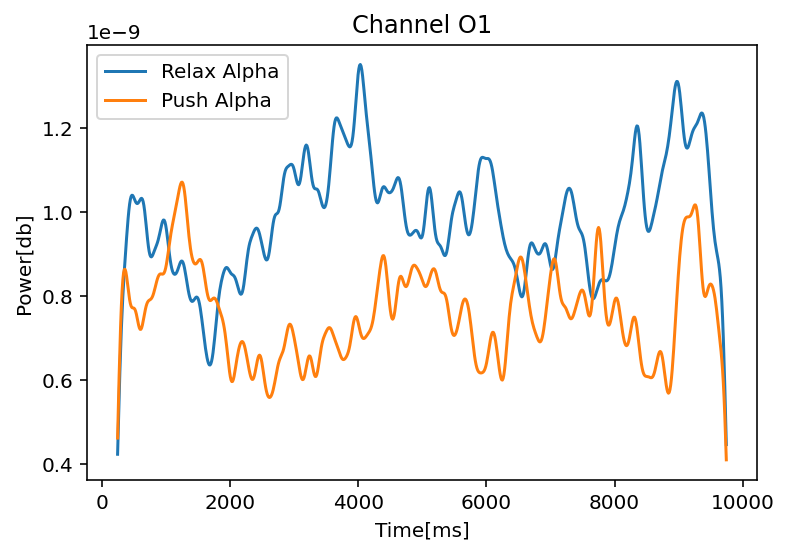

In [39]:
#Plot - Compare Relax vs Push in O1

time=1000 * power_r.times
plt.plot(time,relax_pow_a[6])  
plt.plot(time,push_pow_a[6])  
plt.legend(["Relax Alpha", "Push Alpha"])
plt.title('Channel O1')
plt.xlabel('Time[ms]')
plt.ylabel('Power[db]')
plt.show()

#In the occipital lobe, we can see higher alpha power in relax condition  

Plot the power difference between the two conditions using all channels:

In [41]:
diff = (power_r._data - power_p._data) / np.maximum(power_r._data, power_p._data)  #compute difference

No baseline correction applied


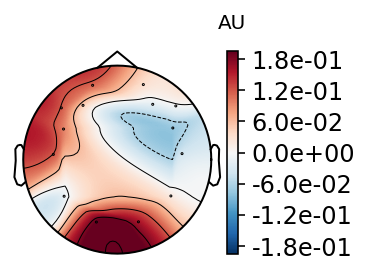

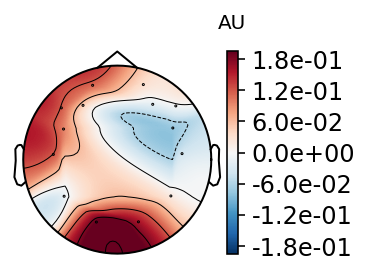

In [44]:
#store some info to plot the object:

time=power_r.times
info=power_r.info
freqs=power_r.freqs
nave=power_r.nave
diff_tfr=mne.time_frequency.AverageTFR(info, diff, time, freqs, nave)
mne.viz.plot_tfr_topomap(diff_tfr, fmin=8, fmax=12) #alpha


## Decoding using Morlet wavelet analysis and SVM

In [49]:
#TFR analysis 

freqs = np.logspace(*np.log10([2, 30]), num=40) # define frequencies of interest (log-spaced) 
n_cycles = freqs / 2.  # different number of cycle per frequency

power_dec = mne.time_frequency.tfr_morlet(epoched_data, freqs=freqs, n_cycles=n_cycles, 
                                           use_fft=True, average=False,
                                           return_itc=False, decim=3, n_jobs=1)


print(power_dec.data.shape)

Not setting metadata
(287, 14, 40, 811)


Average the single-trial power for each frequency bands of interests:

In [53]:
#Theta band 4-7Hz

n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows


theta_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))  
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan):
        pow_t = power_dec.data[samples][chan][(power_dec.freqs>4) & (power_dec.freqs<=7)][:]  
        counter+=1
        pow_avg_t = np.mean(pow_t, axis=0) 
        theta_pow_dec[samples,chan,:]=pow_avg_t


#Alpha band 8-12Hz


n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows

alpha_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))   
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan): 
        pow_a = power_dec.data[samples][chan][(power_dec.freqs>8) & (power_dec.freqs<=12)][:]  
        counter+=1
        pow_avg_a = np.mean(pow_a, axis=0)  
        alpha_pow_dec[samples,chan,:]=pow_avg_a
        
        
#Beta band

n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows

beta_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))    
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan): 
        pow_b = power_dec.data[samples][chan][(power_dec.freqs>13) & (power_dec.freqs<=25)][:]  
        counter+=1
        pow_avg_b = np.mean(pow_b, axis=0)  
        beta_pow_dec[samples,chan,:]=pow_avg_b

Compare performance of SVM on theta, alpha and beta band:

In [55]:
#Define SVM on Theta band:


data= theta_pow_dec  
labels = epoched_data.events[:,-1] 
train_data, test_data, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)

#Define SVM on Theta band:

clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(random_state=173, probability=True ))
parameters = {'svc__kernel':['linear', 'rbf', 'sigmoid'], 'svc__C':[0.1, 1, 10, 100]}
gs_cv_svm = GridSearchCV(clf_svm_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=5), return_train_score=True) #optimise the classifie

#Training is done by passing the training data and their labels to fit() function.

gs_cv_svm.fit(train_data, labels_train)
print('Best Parameters: {}'.format(gs_cv_svm.best_params_))
print('Best Score: {}'.format(gs_cv_svm.best_score_))

predictions_svm = gs_cv_svm.predict(test_data)

#Evaluate
report_svm = classification_report(labels_test, predictions_svm, target_names=['Relax', 'Push'])
print('SVM Clasification Report:\n {}'.format(report_svm))

acc_svm = accuracy_score(labels_test, predictions_svm)
print("Accuracy of SVM model: {}".format(acc_svm))

precision_svm,recall_svm,fscore_svm,support_svm=precision_recall_fscore_support(labels_test,predictions_svm,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_svm,recall_svm,fscore_svm))



Best Parameters: {'svc__C': 10, 'svc__kernel': 'rbf'}
Best Score: 0.595
SVM Clasification Report:
               precision    recall  f1-score   support

       Relax       0.49      0.64      0.56        39
        Push       0.61      0.46      0.52        48

    accuracy                           0.54        87
   macro avg       0.55      0.55      0.54        87
weighted avg       0.56      0.54      0.54        87

Accuracy of SVM model: 0.5402298850574713
Precision: 0.5506535947712419, Recall: 0.5496794871794872, f1-score:0.5396825396825398


In [58]:
#Define SVM on Alpha band:

data= alpha_pow_dec  
labels = epoched_data.events[:,-1] 
train_data, test_data, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)

#Define SVM on Theta band:

clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(random_state=173, probability=True ))
parameters = {'svc__kernel':['linear', 'rbf', 'sigmoid'], 'svc__C':[0.1, 1, 10, 100]}
gs_cv_svm = GridSearchCV(clf_svm_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=5), return_train_score=True) #optimise the classifie

#Training is done by passing the training data and their labels to fit() function.

gs_cv_svm.fit(train_data, labels_train)
print('Best Parameters: {}'.format(gs_cv_svm.best_params_))
print('Best Score: {}'.format(gs_cv_svm.best_score_))

predictions_svm = gs_cv_svm.predict(test_data)

#Evaluate
report_svm = classification_report(labels_test, predictions_svm, target_names=['Relax', 'Push'])
print('SVM Clasification Report:\n {}'.format(report_svm))

acc_svm = accuracy_score(labels_test, predictions_svm)
print("Accuracy of SVM model: {}".format(acc_svm))

precision_svm,recall_svm,fscore_svm,support_svm=precision_recall_fscore_support(labels_test,predictions_svm,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_svm,recall_svm,fscore_svm))



Best Parameters: {'svc__C': 1, 'svc__kernel': 'sigmoid'}
Best Score: 0.645
SVM Clasification Report:
               precision    recall  f1-score   support

       Relax       0.49      0.46      0.47        39
        Push       0.58      0.60      0.59        48

    accuracy                           0.54        87
   macro avg       0.53      0.53      0.53        87
weighted avg       0.54      0.54      0.54        87

Accuracy of SVM model: 0.5402298850574713
Precision: 0.5332432432432432, Recall: 0.5328525641025641, f1-score:0.5327604726100966


In [59]:
#Define SVM on Beta band:

data= beta_pow_dec  
labels = epoched_data.events[:,-1] 
train_data, test_data, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)

#Define SVM on Theta band:

clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(random_state=173, probability=True ))
parameters = {'svc__kernel':['linear', 'rbf', 'sigmoid'], 'svc__C':[0.1, 1, 10, 100]}
gs_cv_svm = GridSearchCV(clf_svm_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=5), return_train_score=True) #optimise the classifie

#Training is done by passing the training data and their labels to fit() function.

gs_cv_svm.fit(train_data, labels_train)
print('Best Parameters: {}'.format(gs_cv_svm.best_params_))
print('Best Score: {}'.format(gs_cv_svm.best_score_))

predictions_svm = gs_cv_svm.predict(test_data)

#Evaluate
report_svm = classification_report(labels_test, predictions_svm, target_names=['Relax', 'Push'])
print('SVM Clasification Report:\n {}'.format(report_svm))

acc_svm = accuracy_score(labels_test, predictions_svm)
print("Accuracy of SVM model: {}".format(acc_svm))

precision_svm,recall_svm,fscore_svm,support_svm=precision_recall_fscore_support(labels_test,predictions_svm,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_svm,recall_svm,fscore_svm))
 

Best Parameters: {'svc__C': 1, 'svc__kernel': 'sigmoid'}
Best Score: 0.575
SVM Clasification Report:
               precision    recall  f1-score   support

       Relax       0.44      0.46      0.45        39
        Push       0.54      0.52      0.53        48

    accuracy                           0.49        87
   macro avg       0.49      0.49      0.49        87
weighted avg       0.50      0.49      0.50        87

Accuracy of SVM model: 0.4942528735632184
Precision: 0.4912513255567338, Recall: 0.49118589743589747, f1-score:0.4909574468085107


In [ ]:
# Compute Confusion Matrix, Precision-Recall Curve, ROC Curve

In [ ]:
# Repeat this classification with Logistic Regression, Linear Discriminant Analysis, Random Forest, K-Nearest Neighbors

In [ ]:
# Visually compare the accuracy of these 5 classifiers on the three freqs band theta-alpha-beta by adding an histogram

In [ ]:
# ADD temporal decoding: https://mne.tools/dev/auto_tutorials/machine-learning/50_decoding.html

Decode in time-frequency through Common Spatial Pattern (CSP) and LDA using data power obtained from Morlet wavelet:

Prepare the dataset to feed to the model

In [60]:
#load datasets
raw_datasets = load_data(os.getcwd()) 

#exclude channels
include_channels = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']  #reference_channels = ['CQ_CMS', 'CQ_DRL']
#include_channels = ['F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8']  #reference_channels = ['CQ_CMS', 'CQ_DRL']
#include_channels = ['O1','O2']  #reference_channels = ['CQ_CMS', 'CQ_DRL']

excl_chan(raw_datasets)

#crop sessions between 65 s and 165 s
for n_file in range (0,30):
    raw_datasets[n_file].crop(tmin=65.,tmax=164.998)
    
#concatenate sessions
raw = concatenate_raws(raw_datasets)

# Extract information from the raw file
sfreq = 256.

#create events
event_id = dict(Relax=0, Push=1)  #imagery relax vs push
events = mne.make_fixed_length_events(raw, id=0, start=0., stop=None, duration=10.)  
for n_events in range(0, len(events)):
    if n_events % 2 == 1: 
        events[n_events][2] = 1 

Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe03_03.02.21_08.33.04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45311  =      0.000 ...   176.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe14_11.02.21_08.36.41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45567  =      0.000 ...   177.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe29_19.02.21_08.40.08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44543  =      0.000 ...   173.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe17_12.02.21_08.44.40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44799  =      0.000 ...   174.996 secs...
Extracting EDF parameters from /Users/ile/Do

In [65]:
## Assemble the classifier using scikit-learn pipeline

clf = make_pipeline(CSP(n_components=4, reg=None, log=True, norm_trace=False), LinearDiscriminantAnalysis())

n_splits = 5  # how many folds to use for cross-validation
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


# Classification & time-frequency parameters
tmin, tmax = 0.5, 9.7
n_cycles = 2.   
min_freq = 4   
max_freq = 25 
n_freqs = 8  


# Assemble list of frequency range tuples

freqs = np.linspace(min_freq, max_freq, n_freqs)  # assemble frequencies
freq_ranges = list(zip(freqs[:-1], freqs[1:]))  # make freqs list of tuples


# Infer window spacing from the max freq and number of cycles to avoid gaps

window_spacing = (n_cycles / np.max(freqs) / 2.)
centered_w_times = np.arange(tmin, tmax, window_spacing)[1:]
n_windows = len(centered_w_times)

# Instantiate label encoder
le = LabelEncoder()

# init scores
freq_scores = np.zeros((n_freqs - 1,))


#Loop through frequencies, apply classifier and save scores
for freq, (fmin, fmax) in enumerate(freq_ranges):
        

    # Infer window size based on the frequency being used
    w_size = n_cycles / ((fmax + fmin) / 2.)  # in seconds
    #print(w_size)
        
    raw_filter = raw.copy().filter(fmin, fmax, n_jobs=1, fir_design='firwin',
                                   skip_by_annotation='edge')
    #print(raw_filter.info)


    # Extract epochs from filtered data, padded by window size
    epochs = mne.Epochs(raw_filter, events, event_id, tmin - w_size, tmax + w_size,
                    proj=False, baseline=None, preload=True)
    #epochs.drop_bad(reject = dict(eeg = 200e-6))
    
    ##########################################################
    epo=epochs_power(epochs)  #feed to the model the power obtained with Morlet
    ##########################################################
    
    y = le.fit_transform(epochs.events[:, 2])
    X = epochs.get_data()
    X = epo
 

    # Save mean scores over folds for each frequency and time window
    freq_scores[freq] = np.mean(cross_val_score(estimator=clf, X=X, y=y,
                                                scoring='roc_auc', cv=cv,
                                                n_jobs=1), axis=0)

Filtering raw data in 30 contiguous segments
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 423 samples (1.652 sec)

Not setting metadata
Not setting metadata
300 matching events found
No baseline correction applied
Loading data for 300 events and 2542 original time points ...
30 bad epochs dropped
Not setting metadata
Computing rank from data with rank=None
    Using tolerance 9.9e-09 (2.2e-16 eps * 14 dim * 3.2e+06  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank 

    Using tolerance 2.5e-09 (2.2e-16 eps * 14 dim * 8.1e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e-09 (2.2e-16 eps * 14 dim * 7.8e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-09 (2.2e-16 eps * 14 dim * 7.9e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-09 (2.2e-16 eps * 14 dim * 7.9e+05  max singular value)
    Estimated rank (mag): 14
    MAG: ra

Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-09 (2.2e-16 eps * 14 dim * 4.4e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-10 (2.2e-16 eps * 14 dim * 1.6e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-09 (2.2e-16 eps * 14 dim * 4.4e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.1e-10 (2.2e-16 eps * 14 dim * 1.6e+05  max singular v

Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-10 (2.2e-16 eps * 14 dim * 8.9e+04  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.9e-10 (2.2e-16 eps * 14 dim * 1.2e+05  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-10 (2.2e-16 eps * 14 dim * 8.8e+04  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    

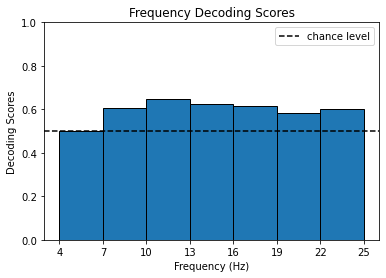

In [66]:
%matplotlib inline
plt.bar(freqs[:-1], freq_scores, width=np.diff(freqs)[0],
        align='edge', edgecolor='black')
plt.xticks(freqs)
plt.ylim([0, 1])
plt.axhline(len(epochs['Relax']) / len(epochs), color='k', linestyle='--',
            label='chance level')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Decoding Scores')
plt.title('Frequency Decoding Scores')
plt.show()

Try to decode using the Energy of Wavelet decomposition coefficients using Daubechies-4 mother wavelet and six decomposition levels:

https://mne.tools/mne-features/generated/mne_features.univariate.compute_wavelet_coef_energy.html#rf1b9e5fdef36-1

In [79]:
from mne_features.feature_extraction import extract_features
from mne_features.univariate import compute_wavelet_coef_energy
from mne_features.feature_extraction import FeatureExtractor

y = epoched_data.events[:,-1]
data=epoched_data.get_data() #all data from the two conditions

selected_funcs = ['wavelet_coef_energy']

pipe = Pipeline([('fe', FeatureExtractor(sfreq=epoched_data.info['sfreq'],
                                         selected_funcs=selected_funcs)),
                 ('scaler', StandardScaler()),
                 ('clf', LogisticRegression(solver='lbfgs'))])
skf = StratifiedKFold(n_splits=3)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2) #training/testing dataset

accuracy = pipe.fit(X_train, y_train).score(X_test, y_test)
print('Accuracy score = %1.3f' % accuracy)

Accuracy score = 0.690


In [72]:
#Try continuous wavelet transform 

https://mne.tools/dev/generated/mne.time_frequency.tfr.cwt.html

In [ ]:
# It seems it does not accepts epochs data, so use raw_datasets[0]
# x = mne.time_frequency.tfr.cwt(raw_datasets[0].get_data(), Ws=[])